<a href="https://colab.research.google.com/github/FabioMMaia/AutoTune_CNN_TransferLearning_adaptation/blob/main/AutoTune_VGG16_CompleteArc_WithFCLayers_random.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# !sudo apt-get update -y
# !sudo apt-get install python3.9 -y
# !echo 2 | sudo update-alternatives --config python3 #'echo 2' auto-inputs '2' so that it doesn't have to be done manually

In [2]:
!python --version

Python 3.10.12


In [3]:
!pip install GPyOpt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 959.4/959.4 kB 16.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.3/71.3 kB 10.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for GPyOpt: filename=GPyOpt-1.2.6-py3-none-any.whl size=83588 sha256=6bb2821ddc7995da17623dba1ac9cf834e18ee9eca1de9325e1fbe759fc5c4c0
  Stored in directory: /root/.cache/pip/wheels/72/17/52/9d818b4c60f733bf49d5cf82bc2758ebbdc57a0471137c37be
  Created wheel for GPy: filename=GPy-1.10.0-cp310-cp310-linux_x86_64.whl size=3420841 sha256=abc260e4cd29abd4cff34ef003f94be78c34c778e33da6b2d48c9f39c800f8dc
  Stored in directory: /root/.cache/pip/wheels/27/bd/9f/82ab4216eae088cba864ca0dc1d75699bd4bf6823790fb2f77
  Created wheel for paramz: filename=paramz-0.9.5-py3-none-any.whl size=102543 sha256=aeaa9071b41b849ba8e792ae

In [4]:
# !pip install keras==2.2.5

In [5]:
!pip install tensorflow==2.13.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.1/524.1 MB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 91.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 100.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 45.8 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.14.0
    Uninstalling tensorflow-estimator-2.14.0:
      Successfully uninstalled tensorflow-estimator-2.14.0
  Attempting uninstall: keras
    Found existing installation: keras 2.14.0
    Uninstalling keras-2.14.0:
      Successfully uninstalled keras-2.14.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.4
    Uninstalling gast-0.5.4:
      Successfully uninstalled gast-0.5.4
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.14.1
    Uninstalling tensorboard-2.14.1:
      Successfully uninstalled tensorboard-2.

In [6]:
import tensorflow as tf
print(tf.__version__)

2.13.0


In [7]:
import time
import os
import math
import numpy as np
import pandas as pd
import GPyOpt
import keras
import random
import math
from itertools import product, combinations
from collections import OrderedDict
from keras.preprocessing import image
from keras import layers, models, optimizers, callbacks, initializers, activations
from keras.applications import VGG16, ResNet50, DenseNet121
import datetime
import tensorflow as tf
import pickle

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Study neural net architectures

In [9]:
vgg16  = VGG16(input_shape=(224, 224, 3), weights='imagenet', include_top=True)
print(len(vgg16.layers))
vgg16.summary()

553467096/553467096 [==============================] - 3s 0us/step
23
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                         

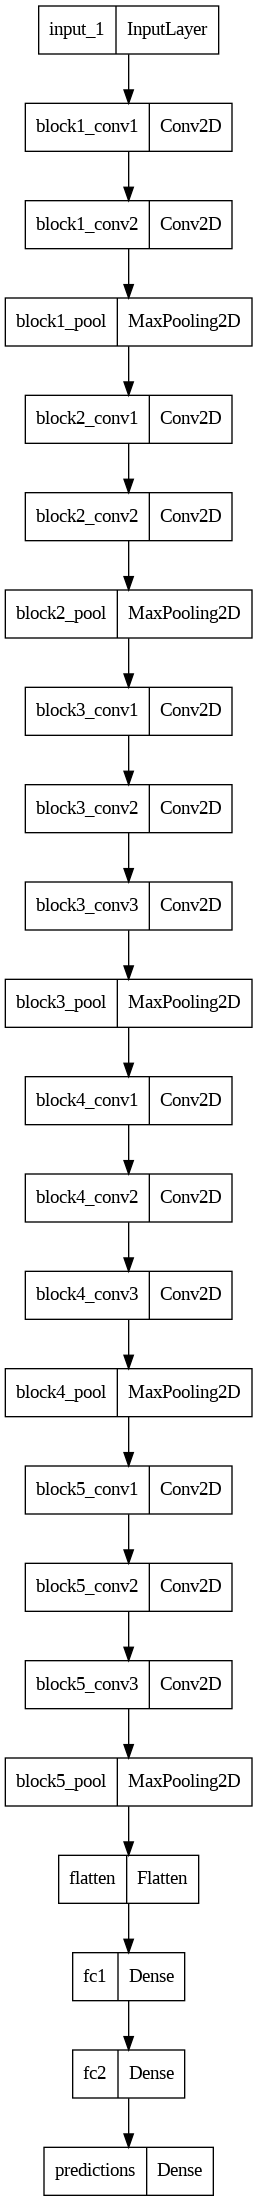

In [10]:
tf.keras.utils.plot_model(
    vgg16, to_file='model.png', show_shapes=False, show_dtype=False,
    show_layer_names=True, rankdir='TB', expand_nested=False, dpi=96,
    layer_range=None
)
# del vgg16

In [11]:
resnet50  = ResNet50(input_shape=(224, 224, 3), weights='imagenet', include_top=True)
print(len(resnet50.layers))
resnet50.summary()


102967424/102967424 [==============================] - 1s 0us/step
177
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_2[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                

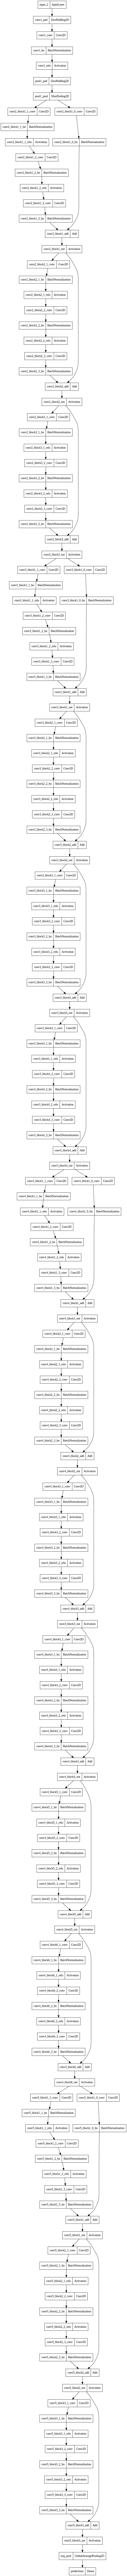

In [12]:
tf.keras.utils.plot_model(
    resnet50, to_file='model.png', show_shapes=False, show_dtype=False,
    show_layer_names=True, rankdir='TB', expand_nested=False, dpi=96,
    layer_range=None
)
# del resnet50

In [13]:
densenet121  = DenseNet121(input_shape=(224, 224, 3), weights='imagenet', include_top=True)
print(len(densenet121.layers))
densenet121.summary()
del densenet121

33188688/33188688 [==============================] - 0s 0us/step
429
Model: "densenet121"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 zero_padding2d (ZeroPaddin  (None, 230, 230, 3)          0         ['input_3[0][0]']             
 g2D)                                                                                             
                                                                                                  
 conv1/conv (Conv2D)         (None, 112, 112, 64)         9408      ['zero_padding2d[0][0]']      
                                                                                                  
 conv1/bn (BatchNor

Application

In [14]:
reverse_list = lambda l: list(reversed(l))

DATA_FOLDER = r'/content/drive/MyDrive/Mestrado/SIN5006/Apresentação II/Codigo/CalTech101'
# DATA_FOLDER = "CalTech101"
TRAIN_PATH = os.path.join(DATA_FOLDER, "training") # Path for training data
VALID_PATH = os.path.join(DATA_FOLDER, "validation") # Path for validation data
NUMBER_OF_CLASSES = len(os.listdir(TRAIN_PATH)) # Number of classes of the dataset
EPOCHS = 50
RESULTS_PATH = os.path.join(r'/content/drive/MyDrive/Mestrado/SIN5006/Apresentação II/Codigo/', "AutoConv_VGG16_randomsearch_log" + "_autoconv_v10_v4.csv") # The path to the results file
# RESULTS_PATH = os.path.join("AutoConv_VGG16_new1", "AutoConv_VGG16_randomsearch_log_" + DATA_FOLDER.split('/')[-1] + "_autoconv_v10.csv") # The path to the results file

# Creating generators from training and validation data
batch_size=8 # the mini-batch size to use for the dataset
datagen = image.ImageDataGenerator(preprocessing_function=keras.applications.vgg16.preprocess_input) # creating an instance of the data generator
train_generator = datagen.flow_from_directory(TRAIN_PATH, target_size=(224, 224), batch_size=batch_size) # creating the generator for training data
valid_generator = datagen.flow_from_directory(VALID_PATH, target_size=(224, 224), batch_size=batch_size) # creating the generator for validation data

# creating callbacks for the model -- ajusted (Fabio): monitor by val_accuracy
reduce_LR = callbacks.ReduceLROnPlateau(monitor='val_accuracy', factor=np.sqrt(0.01), cooldown=0, patience=5, min_lr=0.5e-10)

# Creating a CSV file if one does not exist
try:
    log_df = pd.read_csv(RESULTS_PATH, header=0, index_col=['index'])
except FileNotFoundError:
    # log_df = pd.DataFrame(columns=['index', 'activation', 'weight_initializer', 'num_layers_tuned', 'num_fc_layers', 'num_neurons', 'dropouts', 'filter_sizes', 'num_filters', 'stride_sizes', 'pool_sizes', 'train_loss', 'train_acc', 'val_loss', 'val_acc'])
    log_df = pd.DataFrame(columns=['index', 'activation', 'weight_initializer', 'num_layers_tuned', 'num_fc_layers', 'num_neurons', 'dropouts', 'filter_sizes', 'num_filters', 'stride_sizes', 'pool_sizes', 'train_loss', 'train_acc', 'val_loss', 'val_acc', 'trainable_params', 'frozen_params', 'time'])
    log_df = log_df.set_index('index')


# utility function
def upsample(shape, target_size=5):
    upsampling_factor = math.ceil(target_size / shape[1])
    return layers.UpSampling2D(size=(upsampling_factor, upsampling_factor))


# function to modify architecture for current hyperparams
# model: The original model to be modified.
# index: The index of the layer in the model where modifications will start.
# architecture: A list describing the desired architecture.
# num_filters, filter_sizes, pool_sizes, acts: Lists of hyperparameters specific to each layer in the architecture.
# zero_pads: Not used in this function.
# optim_neurons, optim_dropouts: Lists of units and dropout rates for fully connected layers.

def get_model_conv(model,
                   index,
                   architecture,
                   num_filters,
                   filter_sizes,
                   pool_sizes,
                   acts,
                   zero_pads,
                   optim_neurons,
                   optim_dropouts):

    X = model.layers[index - 1].output

    for i in range(len(architecture)):
        global_index = index + i
        if architecture[i] == 'add':
            continue

        if architecture[i] == 'conv':
            assert type(model.layers[global_index]) == layers.Conv2D
            num_filter = num_filters.pop(0)
            filter_size = filter_sizes.pop(0)
            act = acts.pop(0)
            try:
                X = layers.Conv2D(filters=int(num_filter), kernel_size=(int(filter_size), int(filter_size)), kernel_initializer='he_normal', activation=act)(X)
            except:
                X = upsample(X.shape)(X)
                X = layers.Conv2D(filters=int(num_filter), kernel_size=(int(filter_size), int(filter_size)), kernel_initializer='he_normal', activation=act)(X)
        elif architecture[i] == 'maxpool':
            assert type(model.layers[global_index]) == layers.MaxPooling2D
            pool_size = pool_sizes.pop(0)
            X = layers.MaxPooling2D(pool_size=int(pool_size))(X)
        elif architecture[i] == 'globalavgpool':
            assert type(model.layers[global_index]) == layers.GlobalAveragePooling2D
            X = layers.GlobalAveragePooling2D()(X)
        elif architecture[i] == 'batch':
            assert type(model.layers[global_index]) == layers.BatchNormalization
            X = layers.BatchNormalization()(X)
        elif architecture[i] == 'activation':
            assert type(model.layers[global_index]) == layers.Activation
            X = layers.Activation(acts.pop(0))(X)
        elif architecture[i] == 'flatten':
            X = layers.Flatten()(X)

    for units, dropout in zip(optim_neurons, optim_dropouts):
        X = layers.Dense(units, kernel_initializer='he_normal', activation=acts.pop(0))(X)
        X = layers.BatchNormalization()(X)
        X = layers.Dropout(float(dropout))(X)

    X = layers.Dense(NUMBER_OF_CLASSES, activation='softmax', kernel_initializer='he_normal')(X)
    return models.Model(inputs=model.inputs, outputs=X)


base_model = VGG16(input_shape=(224, 224, 3), weights='imagenet', include_top=True)
for i in range(len(base_model.layers)):
    base_model.layers[i].trainable = False

# training original model
X = base_model.layers[-2].output
X = layers.Dense(NUMBER_OF_CLASSES, activation='softmax', kernel_initializer='he_normal')(X)
to_train_model = models.Model(inputs=base_model.inputs, outputs=X)
to_train_model.compile(optimizer='adagrad', loss='categorical_crossentropy', metrics=['accuracy'])

history = to_train_model.fit_generator(
    train_generator,
    validation_data=valid_generator, epochs=200,  #epochs=EPOCHS,
    steps_per_epoch=len(train_generator) / batch_size,
    validation_steps=len(valid_generator), callbacks=[reduce_LR]
)

# freezing the layers of the model
base_model = VGG16(input_shape=(224, 224, 3), weights='imagenet', include_top=True)
base_model = models.Model(inputs=base_model.inputs, outputs=base_model.layers[-2].output)
for i in range(len(base_model.layers)):
    base_model.layers[i].trainable = False



Found 303 images belonging to 101 classes.
Found 303 images belonging to 101 classes.
Epoch 1/200
4/4 [==============================] - 81s 19s/step - loss: 6.2034 - accuracy: 0.0000e+00 - val_loss: 6.0050 - val_accuracy: 0.0132 - lr: 0.0010
Epoch 2/200
4/4 [==============================] - 8s 2s/step - loss: 5.9706 - accuracy: 0.0250 - val_loss: 5.7884 - val_accuracy: 0.0231 - lr: 0.0010
Epoch 3/200
4/4 [==============================] - 8s 2s/step - loss: 5.3275 - accuracy: 0.0750 - val_loss: 5.5955 - val_accuracy: 0.0099 - lr: 0.0010
Epoch 4/200
4/4 [==============================] - 6s 1s/step - loss: 4.8387 - accuracy: 0.0500 - val_loss: 5.4444 - val_accuracy: 0.0297 - lr: 0.0010
Epoch 5/200
4/4 [==============================] - 4s 910ms/step - loss: 4.7993 - accuracy: 0.1000 - val_loss: 5.3095 - val_accuracy: 0.0396 - lr: 0.0010
Epoch 6/200
4/4 [==============================] - 5s 1s/step - loss: 4.7468 - accuracy: 0.1500 - val_loss: 5.1449 - val_accuracy: 0.0429 - lr: 0.0010

In [15]:
print(EPOCHS)

50


In [16]:

# optimize layers
best_acc = 0
best_acc_model= 0
best_model = None

# list of layers not considered in optimization
meaningless = [
    layers.Activation,
    layers.GlobalAveragePooling2D,
    layers.ZeroPadding2D,
    layers.Add,
    layers.Flatten
]

# search spaces for each kind of hyperparam
filter_size_space = [1, 3]
num_filter_space = [32, 64, 128, 256]
pool_size_space = [2, 3]
units_space = [2 ** j for j in range(6, 11)]
dropouts_space = np.arange(0, 1, step=0.1).tolist()
pad_size_space = list(range(1, 5))
acts_space = [
    activations.relu,
    activations.sigmoid,
    activations.tanh,
    activations.elu,
    activations.selu
]

In [17]:
units_space

[64, 128, 256, 512, 1024]

In [18]:
random.sample(units_space, 1)[0]

64

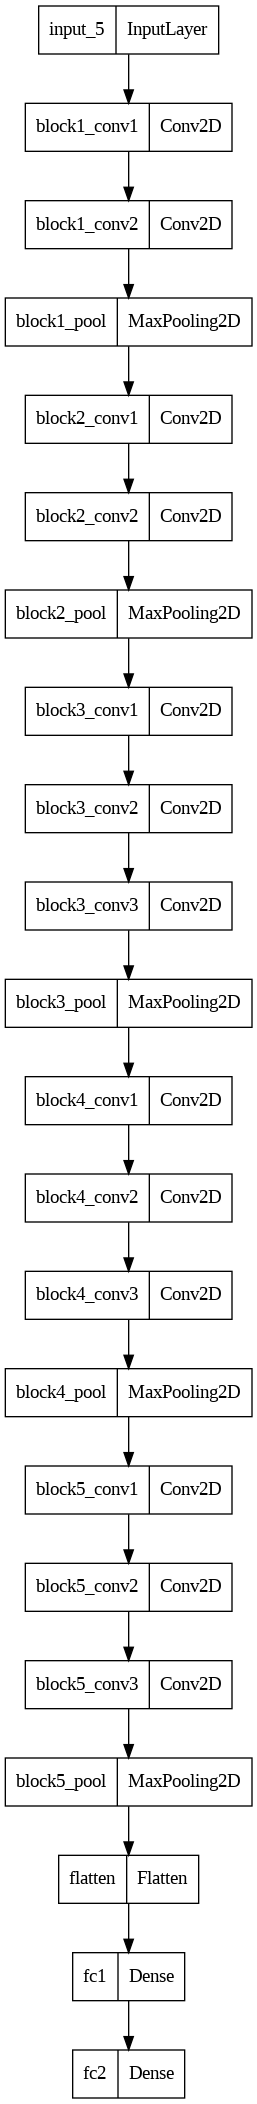

In [19]:
import tensorflow as tf
tf.keras.utils.plot_model(
    base_model, to_file='model.png', show_shapes=False, show_dtype=False,
    show_layer_names=True, rankdir='TB', expand_nested=False, dpi=96,
    layer_range=None
)

In [20]:
base_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [21]:
base_model.layers[-3].output

<KerasTensor: shape=(None, 25088) dtype=float32 (created by layer 'flatten')>

In [22]:
def get_model_conv_info(model):

    trainable_params = 0
    frozen_params = 0

    for layer in model.layers:
        if layer.trainable:
            trainable_params += layer.count_params()
        else:
            frozen_params += layer.count_params()

    return trainable_params, frozen_params

In [23]:
SAVE_MODEL_PATH = os.path.join(r'/content/drive/MyDrive/Mestrado/SIN5006/Apresentação II/Codigo/', "AutoConv_VGG16_randomsearch" + "_best_model.obj")

for unfreeze in range(1, len(base_model.layers) + 1):
    print(f"Tuning last {unfreeze} layers.")
    if type(base_model.layers[-unfreeze]) in meaningless:
        continue

    iter_accs = []

    for k in range(20):
        temp_model = models.Model(inputs=base_model.inputs, outputs=base_model.outputs)
        time.sleep(3)

        curr_filter_size = []
        curr_num_filters = []
        curr_pool_size = []
        curr_acts = []
        curr_pad = []
        curr_units = []
        curr_dropouts = []

        # saving the architecture
        temp_arc = []
        for j in range(1, unfreeze + 1):
            if type(temp_model.layers[-j]) == layers.Conv2D:
                temp_arc.append('conv')
                curr_filter_size.append(random.sample(filter_size_space, 1)[0])
                curr_num_filters.append(random.sample(num_filter_space, 1)[0])
                curr_acts.append(random.sample(acts_space, 1)[0])
            elif type(temp_model.layers[-j]) == layers.MaxPooling2D:
                temp_arc.append('maxpool')
                curr_pool_size.append(random.sample(pool_size_space, 1)[0])
            elif type(temp_model.layers[-j]) == layers.GlobalAveragePooling2D:
                temp_arc.append('globalavgpool')
            elif type(temp_model.layers[-j]) == layers.Activation:
                temp_arc.append('activation')
                curr_acts.append(random.sample(acts_space, 1)[0])
            elif type(temp_model.layers[-j]) == layers.Add:
                temp_arc.append('add')
            elif type(temp_model.layers[-j]) == layers.BatchNormalization:
                temp_arc.append('batch')
            elif type(temp_model.layers[-j]) == layers.ZeroPadding2D:
                temp_arc.append('zeropad')
                curr_pad.append(random.sample(pad_size_space, 1)[0])
            elif type(temp_model.layers[-j]) == layers.Dense:
                temp_arc.append('dense')
                curr_units.append(random.sample(units_space, 1)[0])
                curr_dropouts.append(random.sample(dropouts_space, 1)[0])
                curr_acts.append(random.sample(acts_space, 1)[0])
            elif type(temp_model.layers[-j]) == layers.Flatten:
                temp_arc.append('flatten')

        # for each iteration - create another model
        print(f'#{k}')
        to_train_model = get_model_conv(temp_model, # temporary model
                                        -unfreeze, # number of layer to be modified
                                        reverse_list(temp_arc),
                                        reverse_list(curr_num_filters),
                                        reverse_list(curr_filter_size),
                                        reverse_list(curr_pool_size),
                                        reverse_list(curr_acts), # acts are parameters to modify the actvation target layer
                                        reverse_list(curr_pad),
                                        curr_units,
                                        curr_dropouts)
        to_train_model.compile(optimizer='adagrad', loss='categorical_crossentropy', metrics=['accuracy'])

        # train the modified model
        history = to_train_model.fit_generator(
            train_generator,
            validation_data=valid_generator, epochs=EPOCHS,
            steps_per_epoch=len(train_generator) / batch_size,
            validation_steps=len(valid_generator), callbacks=[reduce_LR]
        )

        best_acc_index = history.history['val_accuracy'].index(max(history.history['val_accuracy']))
        temp_acc = history.history['val_accuracy'][best_acc_index]

        if temp_acc>best_acc_model:
            best_acc_model = temp_acc
            best_model = to_train_model
            with open(SAVE_MODEL_PATH, 'wb') as fp:
              pickle.dump(best_model, fp)

        iter_accs.append(temp_acc)

        # log the results
        n_trainable_params, n_frozen_params = get_model_conv_info(to_train_model)
        log_tuple = (reverse_list(curr_acts), 'he_normal', unfreeze, len(curr_units), reverse_list(curr_units),
                     reverse_list(curr_dropouts), reverse_list(curr_filter_size), reverse_list(curr_num_filters), [1] * len(curr_num_filters),
                     reverse_list(curr_pool_size), history.history['loss'][best_acc_index], history.history['accuracy'][best_acc_index],
                     history.history['val_loss'][best_acc_index], history.history['val_accuracy'][best_acc_index],n_trainable_params, n_frozen_params,
                     datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S') )
        # aux_tuple = list(log_tuple)

        # Add number of trainable parameters
        # n_trainable_params, n_frozen_params = get_model_conv_info(to_train_model)
        # aux_tuple += [n_trainable_params, n_frozen_params]

        log_df.loc[log_df.shape[0], :] = log_tuple
        # log_df.loc[log_df.shape[0], :] = tuple(aux_tuple)
        log_df.to_csv(RESULTS_PATH)

    if best_acc > (sum(iter_accs) / len(iter_accs)):
        aux = (sum(iter_accs) / len(iter_accs))
        print("Validation Accuracy did not improve.")
        print(f"Best validation accuracy is {best_acc} but average of best accuracy is {aux}")
        print(f"Breaking out at {i} layers.")
        break

    best_acc = max(best_acc, sum(iter_accs) / len(iter_accs))



A saída de streaming foi truncada nas últimas 5000 linhas.
4/4 [==============================] - 2s 580ms/step - loss: 4.9004 - accuracy: 0.0500 - val_loss: 5.3243 - val_accuracy: 0.0561 - lr: 1.0000e-04
Epoch 29/50
4/4 [==============================] - 2s 581ms/step - loss: 4.3927 - accuracy: 0.0500 - val_loss: 5.3118 - val_accuracy: 0.0561 - lr: 1.0000e-04
Epoch 30/50
4/4 [==============================] - 2s 579ms/step - loss: 4.8807 - accuracy: 0.0750 - val_loss: 5.2898 - val_accuracy: 0.0462 - lr: 1.0000e-04
Epoch 31/50
4/4 [==============================] - 2s 581ms/step - loss: 4.9744 - accuracy: 0.0500 - val_loss: 5.2841 - val_accuracy: 0.0462 - lr: 1.0000e-04
Epoch 32/50
4/4 [==============================] - 2s 580ms/step - loss: 4.0792 - accuracy: 0.1250 - val_loss: 5.2717 - val_accuracy: 0.0396 - lr: 1.0000e-04
Epoch 33/50
4/4 [==============================] - 2s 581ms/step - loss: 4.7124 - accuracy: 0.0250 - val_loss: 5.2625 - val_accuracy: 0.0396 - lr: 1.0000e-04
Epoch

In [24]:
best_acc

0.18036303715780377

In [25]:
iter_accs

[0.03630363196134567,
 0.35973596572875977,
 0.06270626932382584,
 0.01650165021419525,
 0.36303630471229553,
 0.2211221158504486,
 0.03630363196134567,
 0.3696369528770447,
 0.019801979884505272,
 0.29372936487197876,
 0.10561056435108185,
 0.019801979884505272,
 0.039603959769010544,
 0.01650165021419525,
 0.4356435537338257,
 0.023102309554815292,
 0.16171617805957794,
 0.17491748929023743,
 0.06270626932382584,
 0.03630363196134567]

In [26]:
history = best_model.fit_generator(
    train_generator,
    validation_data=valid_generator, epochs=200,
    steps_per_epoch=len(train_generator) / batch_size,
    validation_steps=len(valid_generator), callbacks=[reduce_LR]
)


Epoch 1/200
4/4 [==============================] - 2s 572ms/step - loss: 0.6050 - accuracy: 0.8205 - val_loss: 2.7454 - val_accuracy: 0.4257 - lr: 0.0010
Epoch 2/200
4/4 [==============================] - 2s 556ms/step - loss: 0.6190 - accuracy: 0.8750 - val_loss: 2.7464 - val_accuracy: 0.4257 - lr: 0.0010
Epoch 3/200
4/4 [==============================] - 2s 557ms/step - loss: 0.6694 - accuracy: 0.7436 - val_loss: 2.7412 - val_accuracy: 0.4323 - lr: 0.0010
Epoch 4/200
4/4 [==============================] - 2s 557ms/step - loss: 0.5715 - accuracy: 0.8750 - val_loss: 2.7404 - val_accuracy: 0.4356 - lr: 0.0010
Epoch 5/200
4/4 [==============================] - 2s 559ms/step - loss: 0.7912 - accuracy: 0.7750 - val_loss: 2.7352 - val_accuracy: 0.4356 - lr: 0.0010
Epoch 6/200
4/4 [==============================] - 2s 558ms/step - loss: 0.5344 - accuracy: 0.8750 - val_loss: 2.7328 - val_accuracy: 0.4356 - lr: 0.0010
Epoch 7/200
4/4 [==============================] - 2s 562ms/step - loss: 0.7

In [27]:
best_model.summary()

Model: "model_111"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0 

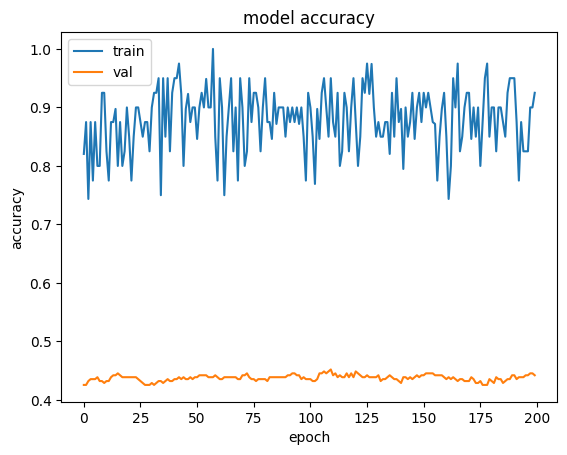

In [28]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()




CLASSE: dragonfly
1/1 [==============================] - 0s 23ms/step
PREDICAO: lotus


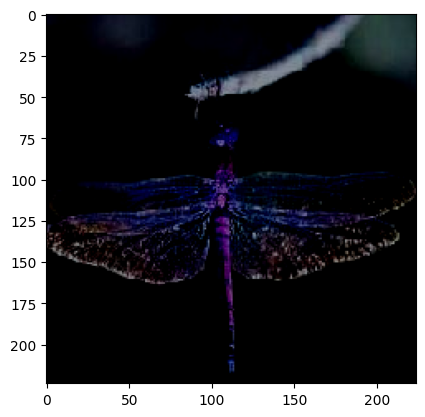

In [66]:
# import cv2

# class_names = list(valid_generator.class_indices.keys())


# for x in valid_generator:
#     img_raw = x[0]
#     label = x[1]
#     img = np.transpose(img_raw, (0, 2, 1, 3))
#     img = img[0]
#     label = label[0]
#     img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#     img_rgb = img_rgb / 255.0
#     plt.imshow(img_rgb)
#     # print(label)
#     print('\n\n')
#     print('CLASSE:', class_names[label.argmax()])
#     print('PREDICAO:', class_names[best_model.predict(img_raw)[0].argmax()])
#     break

1/1 [==============================] - 0s 23ms/step


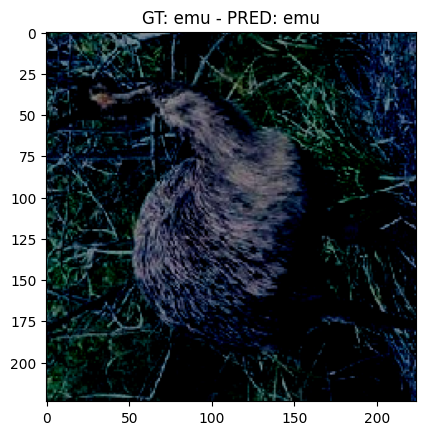

1/1 [==============================] - 0s 24ms/step


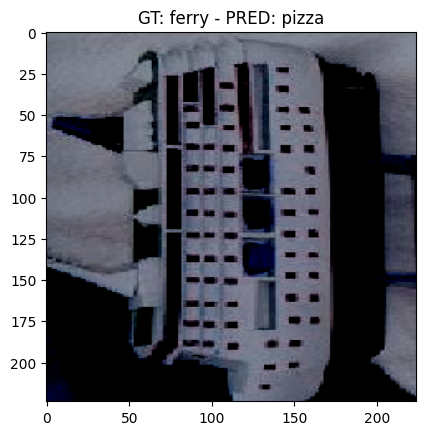

1/1 [==============================] - 0s 22ms/step


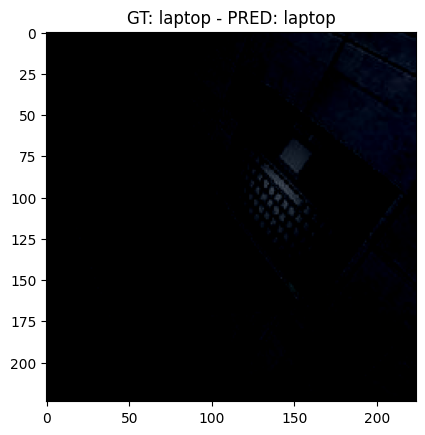

1/1 [==============================] - 0s 22ms/step


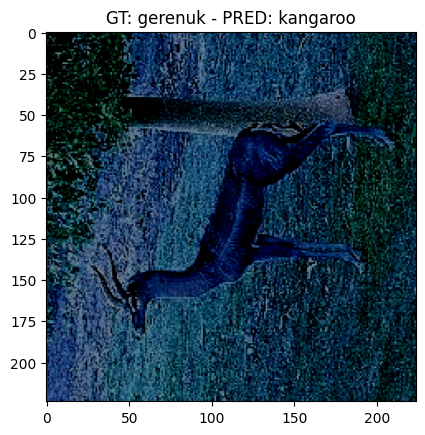

1/1 [==============================] - 0s 25ms/step


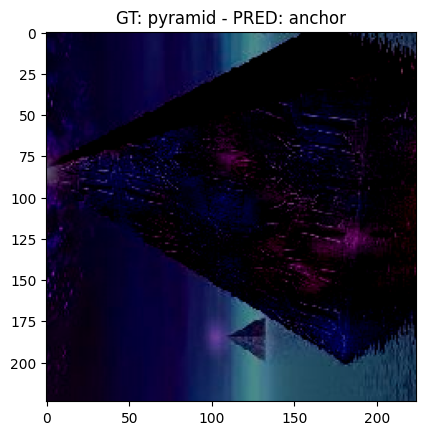

1/1 [==============================] - 0s 23ms/step


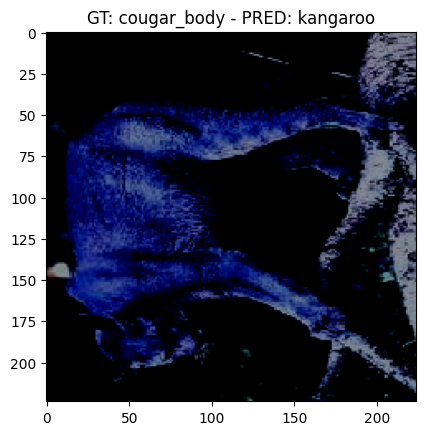

1/1 [==============================] - 0s 25ms/step


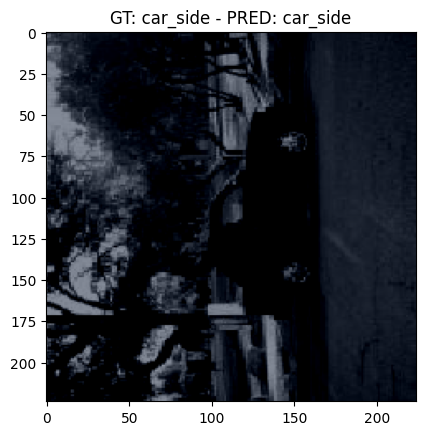

1/1 [==============================] - 0s 26ms/step


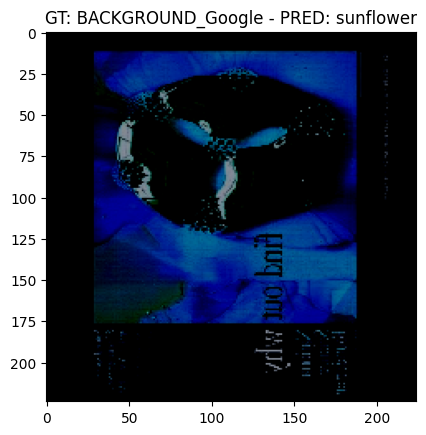

In [71]:
class_names = list(valid_generator.class_indices.keys())
import cv2

for x in valid_generator:
    imgs_raw = x[0]
    labels = x[1]

    imgs = np.transpose(imgs_raw, (0, 2, 1, 3))
    for i in range(len(imgs)):
        img = imgs[i]
        label = labels[i]
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img_rgb = img_rgb / 255.0

        plt.imshow(img_rgb)

        # print('\n\n')
        # print('CLASSE:', class_names[label.argmax()])
        # print('PREDICAO:', class_names[best_model.predict(imgs_raw)[i].argmax()])
        GT = class_names[label.argmax()]
        PRED =  class_names[best_model.predict(imgs_raw)[i].argmax()]
        plt.title(f'GT: {GT} - PRED: {PRED}')
        plt.show()

    break
